**UE 4268 - Examen 2023**

**`DONGMO FOUELEMO`**, `17C2479` et `` junior.dongmo29902@facsciences-uy1.cm

Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`pmb

`Date`19-06-2023

In [1]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

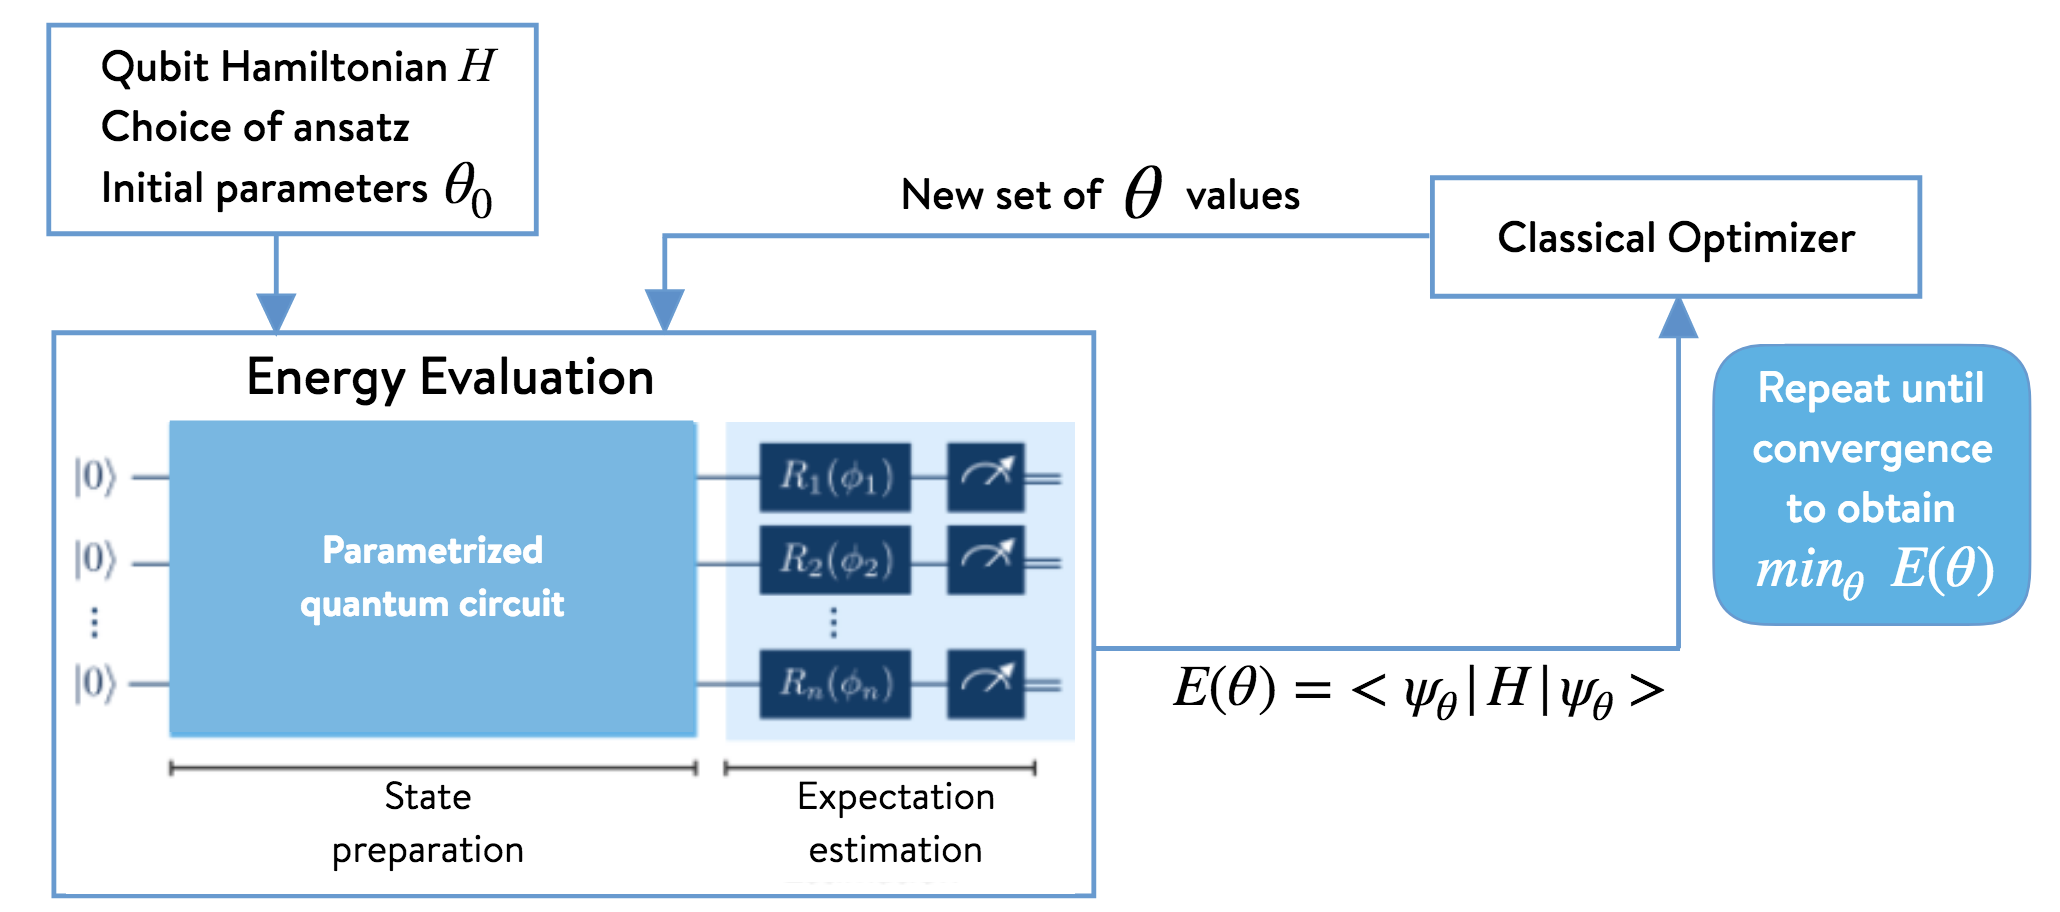

In [2]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
import rdkit
print(rdkit.__version__)

In [ ]:
1

In [ ]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [ ]:
pip install 'rdkit'

In [ ]:
#permet de ressortir la molecule
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

In [ ]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) 
# the number 2 denotes the number of iterations in Morgan algorithm.

fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fps.append(fp)

fps = np.asarray(fps) # Convert our encoded molecule to an array
fps.shape


In [ ]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/smilesZn10.txt')

In [ ]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split() for smi in content]
    
smile

In [ ]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [ ]:
molecule = df1.iloc[:,1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

In [ ]:
descriptors_df1 = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df1, descriptors_df1], axis=1)
data

In [ ]:
data.isnull().sum()

In [ ]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)
#

In [ ]:
fps = np.asarray(fps)
fps
#

In [ ]:
fps.shape
#taille de nos fingerprints

In [ ]:
2) split dataset to training set and test set

In [ ]:
logp = data.iloc[:,3].values

In [ ]:
logp.shape[0] == fps.shape[0]

In [ ]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

In [ ]:
3) train a SVR model

In [ ]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print('The r2_score is {} '.format(r2),'and the mean square error is {}'.format(mse))
#pour afficher les scores

In [ ]:
5) visualise

In [ ]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()
# pour visualiser

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

In [ ]:
# Import libraries 
import numpy as np
#Permet de tracer
import matplotlib.pyplot as plt
#bibliotheque
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [9]:
pip install 'rdkit'

Note: you may need to restart the kernel to use updated packages.


In [10]:
#permet de ressortir la molecule
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

NameError: name 'Chem' is not defined

In [ ]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) 
# the number 2 denotes the number of iterations in Morgan algorithm.

fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fps.append(fp)

fps = np.asarray(fps) # Convert our encoded molecule to an array
fps.shape


In [ ]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/smilesZn100.txt')

In [ ]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split() for smi in content]
    
smile

In [ ]:
PandasTools.AddMoleculeColumnToFrame(frame=df1, smilesCol='Smiles', molCol='Molecules')
df1

In [11]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [12]:
molecule = df1.iloc[:,1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

NameError: name 'df1' is not defined

In [13]:
descriptors_df1 = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df1, descriptors_df1], axis=1)
data

NameError: name 'pd' is not defined

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [7]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np

def vqe_solver(converter, optimizer):
    """ Setup VQE solver

    Args:
        converter : qubit converter 
        optimizer : optimizer

    Returns: vqe solver
    """    
    vqe_solver = VQE(estimator, ansatz(converter), optimizer)

    vqe_solver.initial_point = np.zeros(ansatz(converter).num_parameters)
    return vqe_solver

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

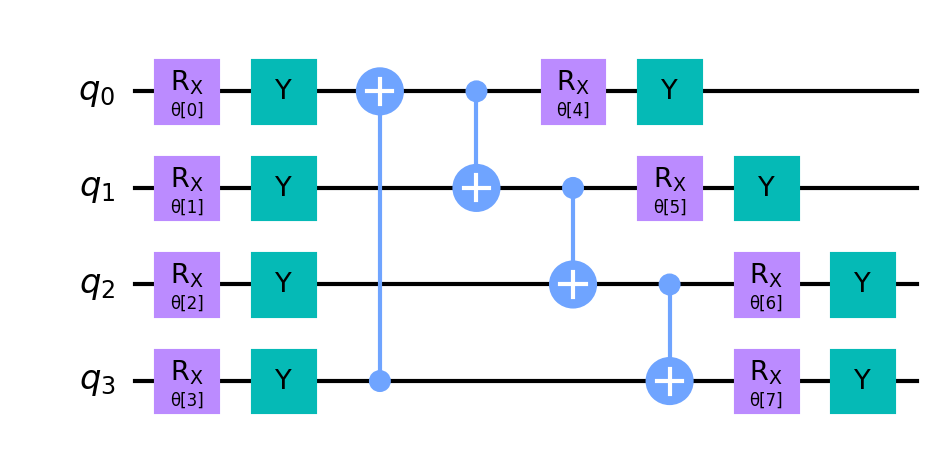

In [3]:
Image(filename='./SU2_Ansatz.png', width=400)

In [2]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

In [3]:
H_driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

MissingOptionalLibraryError: "The 'pyscf' library is required to use 'PySCFDriver'.  See https://pyscf.org/install.html."

In [ ]:
from qiskit_nature.second_q.mappers import (
    ParityMapper,
    JordanWignerMapper,
    BravyiKitaevMapper, 
    QubitConverter
)

def ansatz(converter):
    """Ansatz function

    Args:
        converter : the output of the function qubit_converter(mapper)

    Returns: The anstatz
    """    
    
    ansatz = UCCSD(
        circuitQ,
        (theta,
            
        ),
    )
    return ansatz

In [ ]:
from qiskit.primitives import Estimator 

estimator = Estimator()

In [ ]:
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B

In [4]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np
#permet d calculer l'energie
def vqe_solver(converter, optimizer):# le mapper ici on choisi ce qu'on veut mettre on peut mettre jw; bk
    """ Setup VQE solver

    Args:
        converter : qubit converter 
        optimizer : optimizer

    Returns: vqe solver
    """    
    vqe_solver = VQE(estimator, circuitQ, optimizer)
# par exemple si on veut plutot utiliser le circuit on remplace ansatz par le circuit
    #vqe_solver.initial_point = np.zeros(ansatz(converter).num_parameters)
    return vqe_solver

In [5]:
def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    """Computing of the molecular ground state with the `GroundStateEigensolver`
class 
    Args:
        problem :  Electronic structure problem

        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
        
        optimizer :  Optimizer string that can be either "SPSA" or "SLSQP" or "L_BFGS_B"

        solver :  Sting that can be either "NumPy" or "VQE"
       
    Returns:
          The ground state of the molecule

    """    
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            q_conv = qubit_converter(v)   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:        
                opt = m
        GS_solver = vqe_solver(q_conv, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(q_conv, GS_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver


In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import parameter
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")

NameError: name 'H2_problem' is not defined

In [ ]:
from qiskit import QuantumCircuit
, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.quantum_info import state_fidelity
from qiskit import Aer, transpile

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [ ]:
qc = QuantumCircuit(4)
qc.x(0)
qc.x(1)
qc.rx(pi/2,0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.cx([0],[1])
qc.cx([1],[2])
qc.cx([2],[3])
qc.rz(theta,3)
qc.cx([2],[3])
qc.cx([1],[2])
qc.cx([0],[1])
qc.h(1)
qc.h(2)
qc.h(3)
qc.rx(-pi/2,0)
qc.draw('mpl',initial_state=True)

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [ ]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [ ]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

# Put your code here